In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch
from src import models_utils as muts
from models.Classifier_Models import Classifier_MBN_V0
from src.Dataset import MaskDataset, MaskDatasetAugmented
from src.EarlyStopping import EarlyStopping
from torch.utils.data import (
    Dataset,
    DataLoader
)
import os
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

ROOT_THIS_DIR = "C:/Users/borqu/OneDrive/Escritorio/root/FCFM/Otoño2023/Instacrops-Enfermedades"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")





import torch
import torch.nn as nn
import torchvision.models as torchmodels
import torch.optim as optim




### Balance de clases

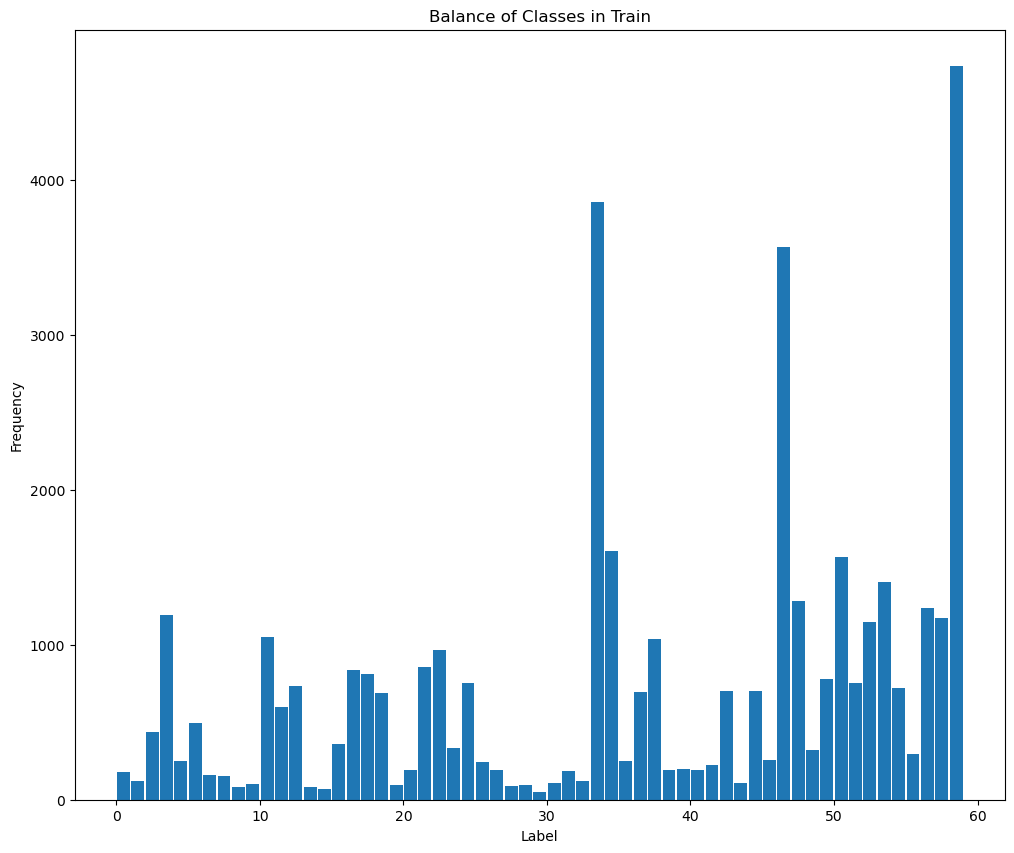

In [3]:
Traindf = pd.read_csv('TrainClf.csv')

unique_values = np.unique(Traindf['labels'])
hist, edges = np.histogram(Traindf['labels'], bins = unique_values)
centers = (edges[:-1] + edges[1:]) / 2

bar_width = edges[1] - edges[0]

plt.figure(figsize=(12, 10))

plt.bar(centers, hist, width=0.9)

plt.title('Balance of Classes in Train')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.show()

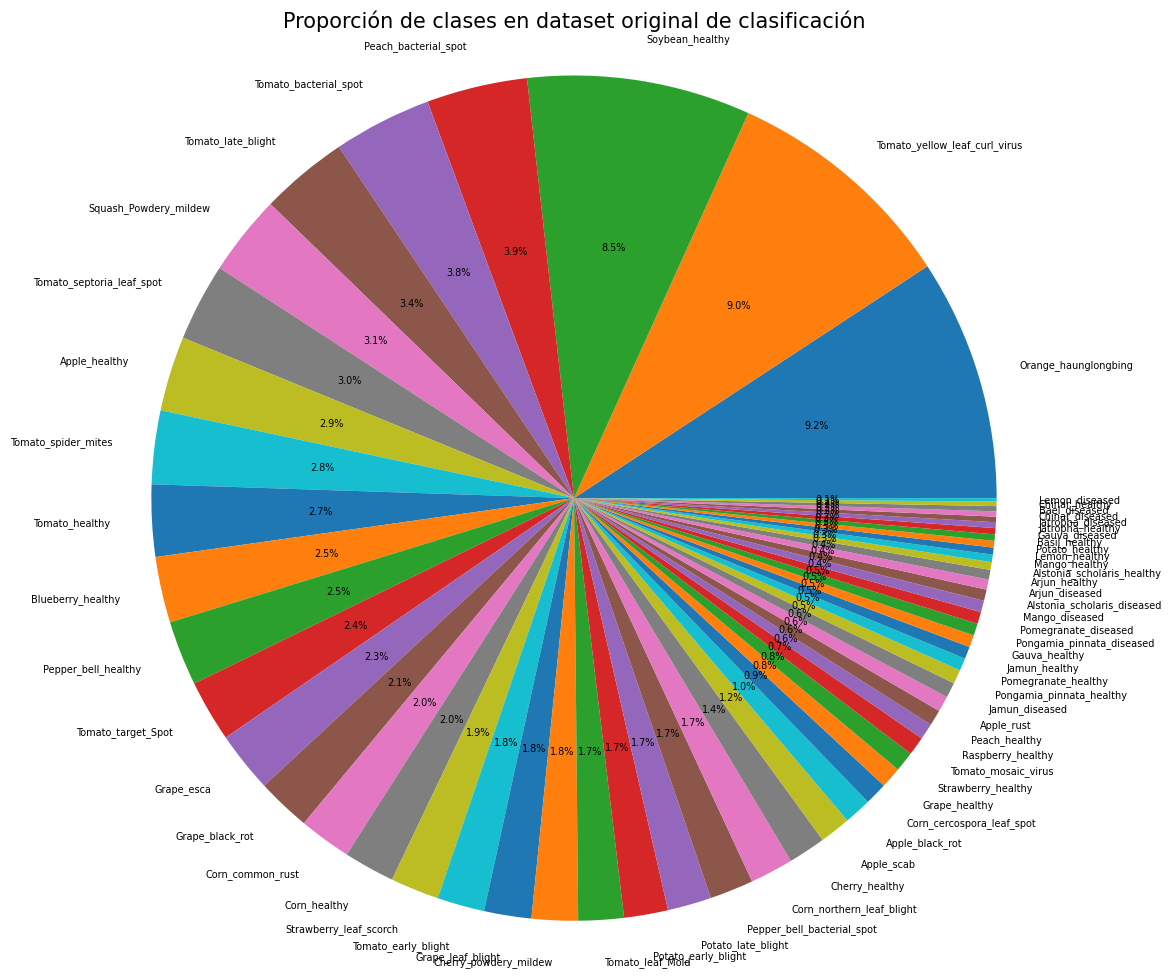

In [4]:
import os
import matplotlib.pyplot as plt

directorio_raiz = "data/data_classification/"  

subdirectorios = [nombre for nombre in os.listdir(directorio_raiz) if os.path.isdir(os.path.join(directorio_raiz, nombre))]

cantidades = [len(os.listdir(os.path.join(directorio_raiz, subdirectorio))) for subdirectorio in subdirectorios]

cantidades_ordenadas = sorted(cantidades, reverse=True)
subdirectorios_ordenados = [subdirectorios[i] for i in sorted(range(len(cantidades)), key=lambda k: cantidades[k], reverse=True)]

total = sum(cantidades_ordenadas)
porcentaje_umbral = 10  
fig, ax = plt.subplots(figsize=(12, 12))

ax.pie(cantidades_ordenadas, labels=subdirectorios_ordenados, autopct='%1.1f%%', textprops={'fontsize': 7})
ax.axis('equal')  
for i, cantidad in enumerate(cantidades_ordenadas):
    porcentaje = (cantidad / total) * 100
    if porcentaje >= porcentaje_umbral:
        ax.text(0.9, 0.6-i*0.05, f"{subdirectorios_ordenados[i]}: {porcentaje:.1f}%", transform=ax.transAxes, fontsize=10)


plt.title("Proporción de clases en dataset original de clasificación", fontsize = 15)
plt.show()

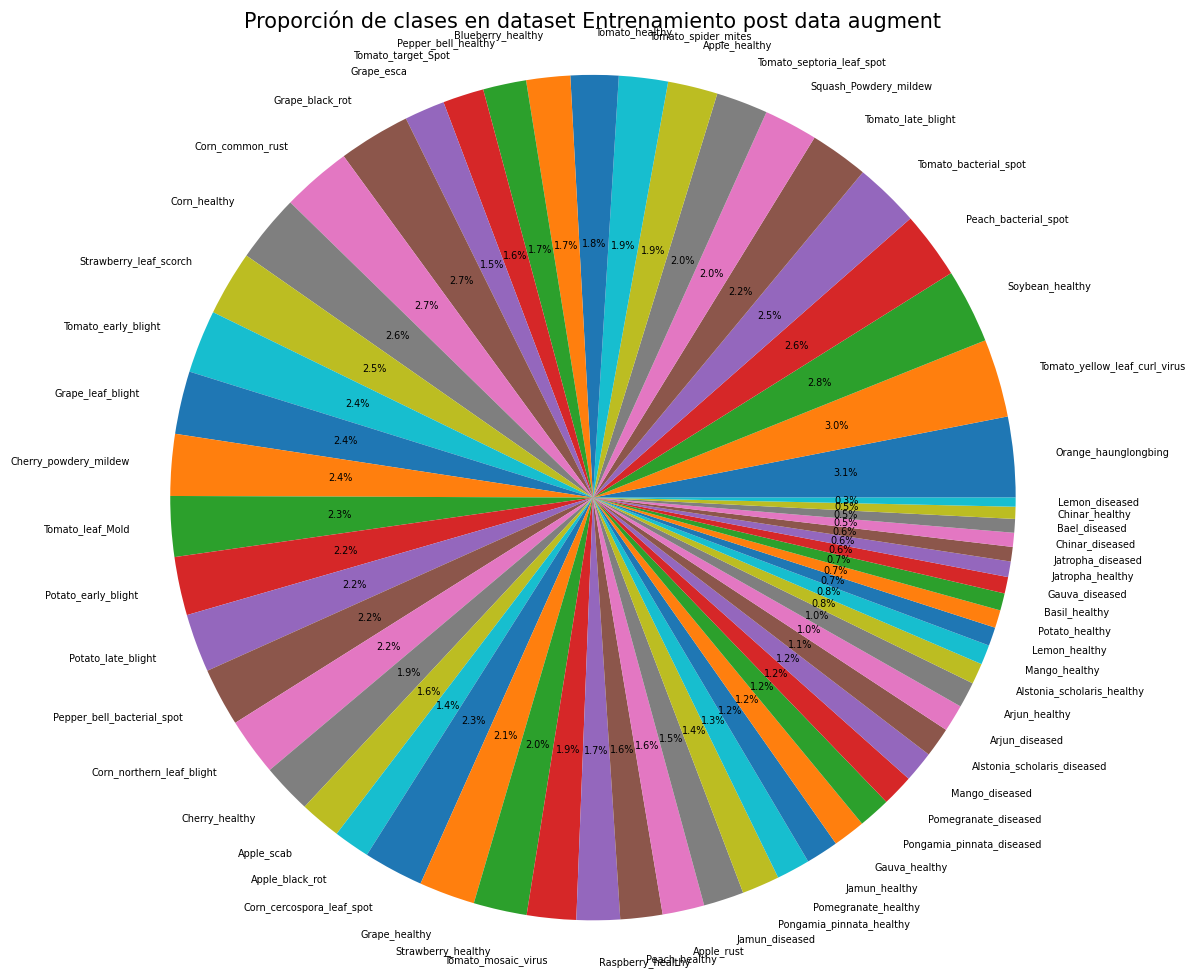

In [5]:
NoAug = [33, 59, 46]
SoftAug = [34, 50, 53, 47, 56, 3, 57, 52, 10, 37, 58, 22]
HardAug = [21, 16, 17, 49, 51, 24, 12, 54, 44, 42, 36, 18, 11, 5, 2]
ExtremeAug = [15, 23, 48, 55, 45, 35, 4, 25, 41, 39, 26, 20, 40, 38, 31, 0, 6, 7, 1, 32, 30, 43, 9, 19, 28, 27, 13, 8, 14, 29]

Groups = [len(NoAug) ,len(SoftAug), len(HardAug), len(ExtremeAug)]
na = cantidades_ordenadas[:len(NoAug)]
sa = cantidades_ordenadas[len(NoAug):len(SoftAug)+len(NoAug)]
ha = cantidades_ordenadas[len(SoftAug)+len(NoAug):len(HardAug)+len(SoftAug)+len(NoAug)]
xa = cantidades_ordenadas[len(HardAug)+len(SoftAug)+len(NoAug):len(HardAug)+len(SoftAug)+len(NoAug)+len(ExtremeAug)]

augmented = []
for c in na:
    augmented.append(c)
for c in sa:
    augmented.append(2*c)
for c in ha:
    augmented.append(4*c)
for c in xa:
    augmented.append(8*c)


import os
import matplotlib.pyplot as plt

directorio_raiz = "data/data_classification/"  # Reemplaza con la ruta de tu directorio raíz

subdirectorios = [nombre for nombre in os.listdir(directorio_raiz) if os.path.isdir(os.path.join(directorio_raiz, nombre))]

cantidades = [len(os.listdir(os.path.join(directorio_raiz, subdirectorio))) for subdirectorio in subdirectorios]

cantidades_ordenadas = sorted(cantidades, reverse=True)
subdirectorios_ordenados = [subdirectorios[i] for i in sorted(range(len(cantidades)), key=lambda k: cantidades[k], reverse=True)]

total = sum(cantidades_ordenadas)
porcentaje_umbral = 10 

fig, ax = plt.subplots(figsize=(12, 12))

ax.pie(augmented, labels=subdirectorios_ordenados, autopct='%1.1f%%', textprops={'fontsize': 7})
ax.axis('equal') 


for i, cantidad in enumerate(augmented):
    porcentaje = (cantidad / total) * 100
    if porcentaje >= porcentaje_umbral:
        ax.text(0.9, 0.6-i*0.05, f"{subdirectorios_ordenados[i]}: {porcentaje:.1f}%", transform=ax.transAxes, fontsize=10)


plt.title("Proporción de clases en dataset Entrenamiento post data augment", fontsize = 15)
plt.show()

In [41]:
print((cantidades_ordenadas[len(NoAug)-1]/total)*100)
print((cantidades_ordenadas[(len(NoAug) + len(SoftAug))-1]/total)*100)
print((cantidades_ordenadas[(len(NoAug) + len(SoftAug) + len(HardAug)) - 1]/total)*100)
print((cantidades_ordenadas[-1]/total)*100)

8.542561761546724
2.32109291084855
1.0422261009667024
0.12922932330827067


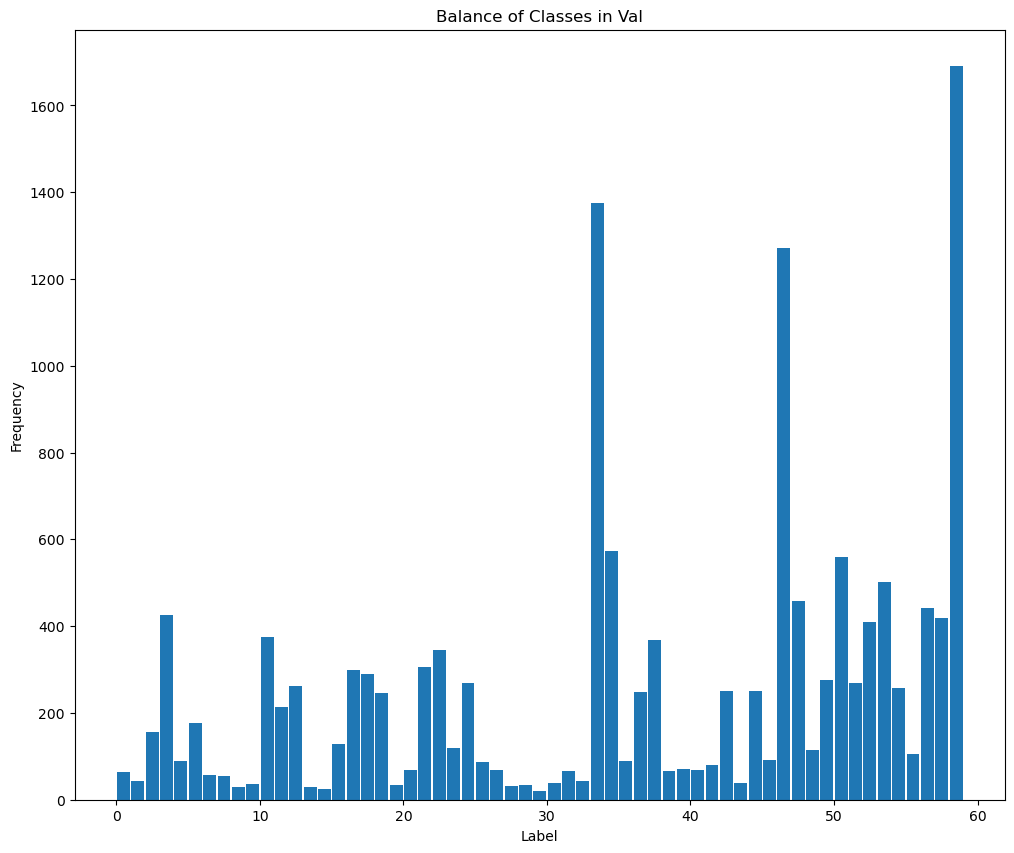

In [3]:
Valdf = pd.read_csv('ValClf.csv')

unique_values = np.unique(Valdf['labels'])
hist, edges = np.histogram(Valdf['labels'], bins = unique_values)
centers = (edges[:-1] + edges[1:]) / 2

bar_width = edges[1] - edges[0]

plt.figure(figsize=(12, 10))

plt.bar(centers, hist, width=0.9)

plt.title('Balance of Classes in Val')
plt.xlabel('Label')
plt.ylabel('Frequency')

# show the plot
plt.show()

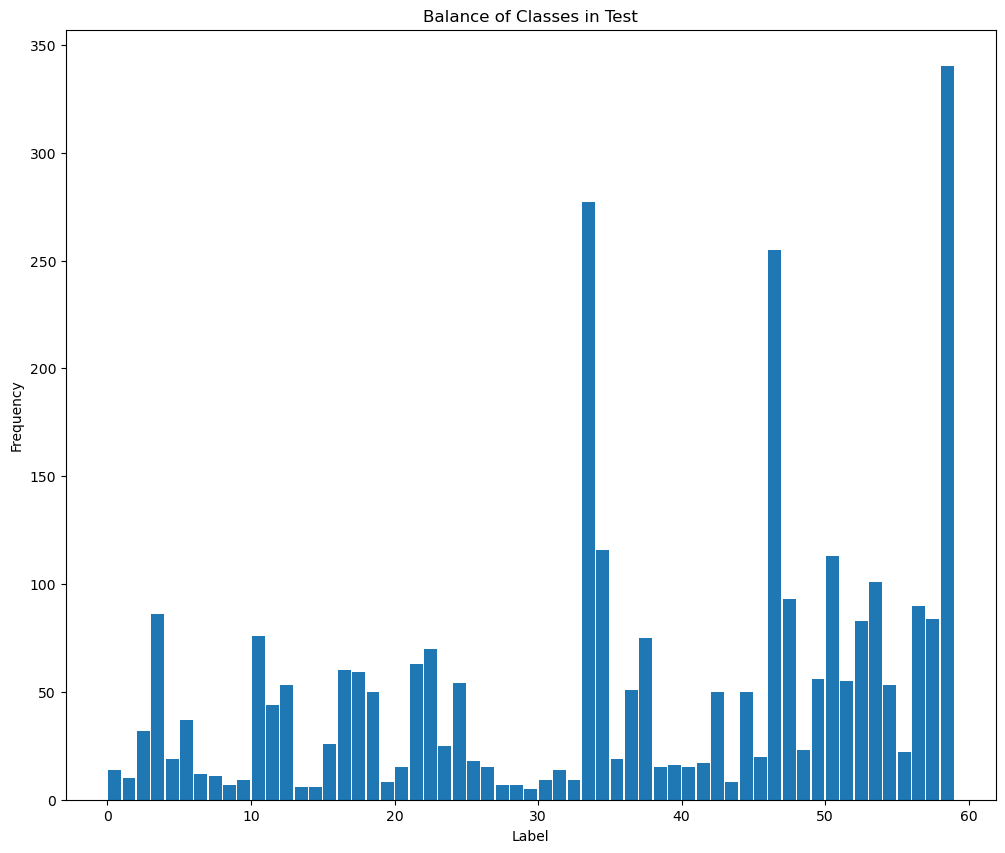

In [4]:
Testndf = pd.read_csv('TestClf.csv')

unique_values = np.unique(Testndf['labels'])
hist, edges = np.histogram(Testndf['labels'], bins = unique_values)
centers = (edges[:-1] + edges[1:]) / 2

bar_width = edges[1] - edges[0]

plt.figure(figsize=(12, 10))

plt.bar(centers, hist, width=0.9)

plt.title('Balance of Classes in Test')
plt.xlabel('Label')
plt.ylabel('Frequency')

# show the plot
plt.show()

### Probando modelo guardado

In [8]:
my_transforms = transforms.Compose(
    [   
        transforms.Resize((224, 224)),
        transforms.Lambda(lambda x: x.convert('RGB')),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]
        ),
    ]
)

test_dataset = MaskDataset(
    csv_file=os.path.join(ROOT_THIS_DIR, "ValClf.csv"),
    root_dir=ROOT_THIS_DIR,
    transform=my_transforms,

)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=32, shuffle=True)


model_file_name = "MobileNet_Total_Augment2.pt"
model_saved_path = os.path.join("models","checkpoints",model_file_name)
checkpoint = torch.load(model_saved_path)

num_classes = 60
model = Classifier_MBN_V0(n_classes = num_classes)
model.to(device)
model.load_state_dict(checkpoint['model_state_dict'])

model.to(device)
ground_truth, predicted = muts.check_accuracy(test_loader, model, device)

c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Checking accuracy on given data


100%|██████████| 465/465 [05:47<00:00,  1.34it/s]

Got 14283 / 14874 with accuracy 96.03


In [9]:
print("Using micro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='micro')
recall = recall_score(ground_truth, predicted, average='micro')
f1 = f1_score(ground_truth, predicted, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using macro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='macro')
recall = recall_score(ground_truth, predicted, average='macro')
f1 = f1_score(ground_truth, predicted, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using weighted average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='weighted')
recall = recall_score(ground_truth, predicted, average='weighted')
f1 = f1_score(ground_truth, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

Using micro average
Accuracy: 0.9602662363856393
Precision: 0.9602662363856393
Recall: 0.9602662363856393
F1 score: 0.9602662363856393
------------

Using macro average
Accuracy: 0.9602662363856393
Precision: 0.937936587543563
Recall: 0.9374266515317209
F1 score: 0.9354219978824845
------------

Using weighted average
Accuracy: 0.9602662363856393
Precision: 0.9619123577316495
Recall: 0.9602662363856393
F1 score: 0.960245518856286
------------



Precisión global (Accuracy): 0.9602662363856393


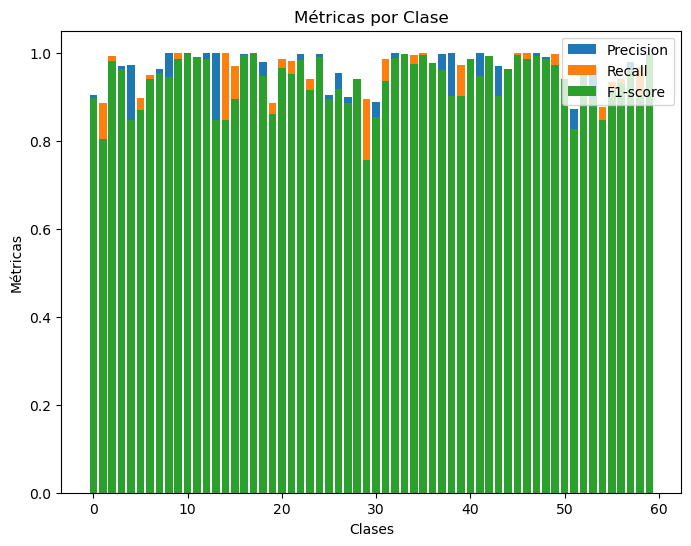

In [10]:
precision = precision_score(ground_truth, predicted, average=None)
recall = recall_score(ground_truth, predicted, average=None)
f1 = f1_score(ground_truth, predicted, average=None)
accuracy = accuracy_score(ground_truth, predicted)
print(f"Precisión global (Accuracy): {accuracy}")


unique_values = np.unique(Traindf['labels'])
plt.figure(figsize=(8, 6))
plt.bar(unique_values, precision, label='Precision')
plt.bar(unique_values, recall, label='Recall')
plt.bar(unique_values, f1, label='F1-score')
plt.xlabel('Clases')
plt.ylabel('Métricas')
plt.title('Métricas por Clase')
plt.legend()
plt.show()

### Otros experimentos/entrenamientos

*Disclaimer* : A partir de aquí hay código que falta por limpiar, ordenar o derechamente borrar.


In [3]:
batch_size = 32
num_classes = 60

In [9]:

resnet18 = torchmodels.resnet18(pretrained=True)
resnet18.fc = nn.Linear(resnet18.fc.in_features, num_classes)

resnet50 = torchmodels.resnet50(pretrained=True)
resnet50.fc = nn.Linear(resnet50.fc.in_features, num_classes)

c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent

In [4]:
my_transforms = transforms.Compose(
    [   
        transforms.Resize((224, 224)),
        transforms.Lambda(lambda x: x.convert('RGB')),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]
        ),
    ]
)

train_dataset = MaskDataset(
    csv_file=os.path.join(ROOT_THIS_DIR, "TrainClf.csv"),
    root_dir=ROOT_THIS_DIR,
    transform=my_transforms,

)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size, shuffle=True)

val_dataset = MaskDataset(
    csv_file=os.path.join(ROOT_THIS_DIR, "ValClf.csv"),
    root_dir=ROOT_THIS_DIR,
    transform=my_transforms,

)

val_loader = DataLoader(dataset=val_dataset,
                         batch_size=batch_size, shuffle=True)

In [9]:
EPOCHS = 5
LR = 1e-3

model = resnet18
model.to(device)
early_stopping = EarlyStopping(patience=5, verbose=True)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.1, patience=5, verbose=True
)

muts.train_model(model,
                 train_loader, 
                 val_loader, 
                 criterion, 
                 optimizer,
                 scheduler, 
                 EPOCHS, 
                 device, 
                 early_stopping,)

100%|██████████| 1303/1303 [20:01<00:00,  1.08it/s]


Cost at epoch 1 is 0.4570164264766578 | valid_loss: 0.22609 | train_loss: 0.45702
Validation loss decreased (inf --> 0.226094).  Saving model ...


100%|██████████| 1303/1303 [20:21<00:00,  1.07it/s]


Cost at epoch 2 is 1.9164066954429388 | valid_loss: 0.85855 | train_loss: 1.91641
EarlyStopping counter: 1 out of 5


100%|██████████| 1303/1303 [20:21<00:00,  1.07it/s]


Cost at epoch 3 is 0.49071771455950125 | valid_loss: 0.32940 | train_loss: 0.49072
EarlyStopping counter: 2 out of 5


100%|██████████| 1303/1303 [20:21<00:00,  1.07it/s]


Cost at epoch 4 is 0.2910425162110092 | valid_loss: 0.29623 | train_loss: 0.29104
EarlyStopping counter: 3 out of 5


100%|██████████| 1303/1303 [20:16<00:00,  1.07it/s]


Cost at epoch 5 is 0.21322238008335878 | valid_loss: 0.23173 | train_loss: 0.21322
EarlyStopping counter: 4 out of 5


Checking accuracy on given data


100%|██████████| 465/465 [06:10<00:00,  1.26it/s]


Got 13773 / 14874 with accuracy 92.60
Resnet18


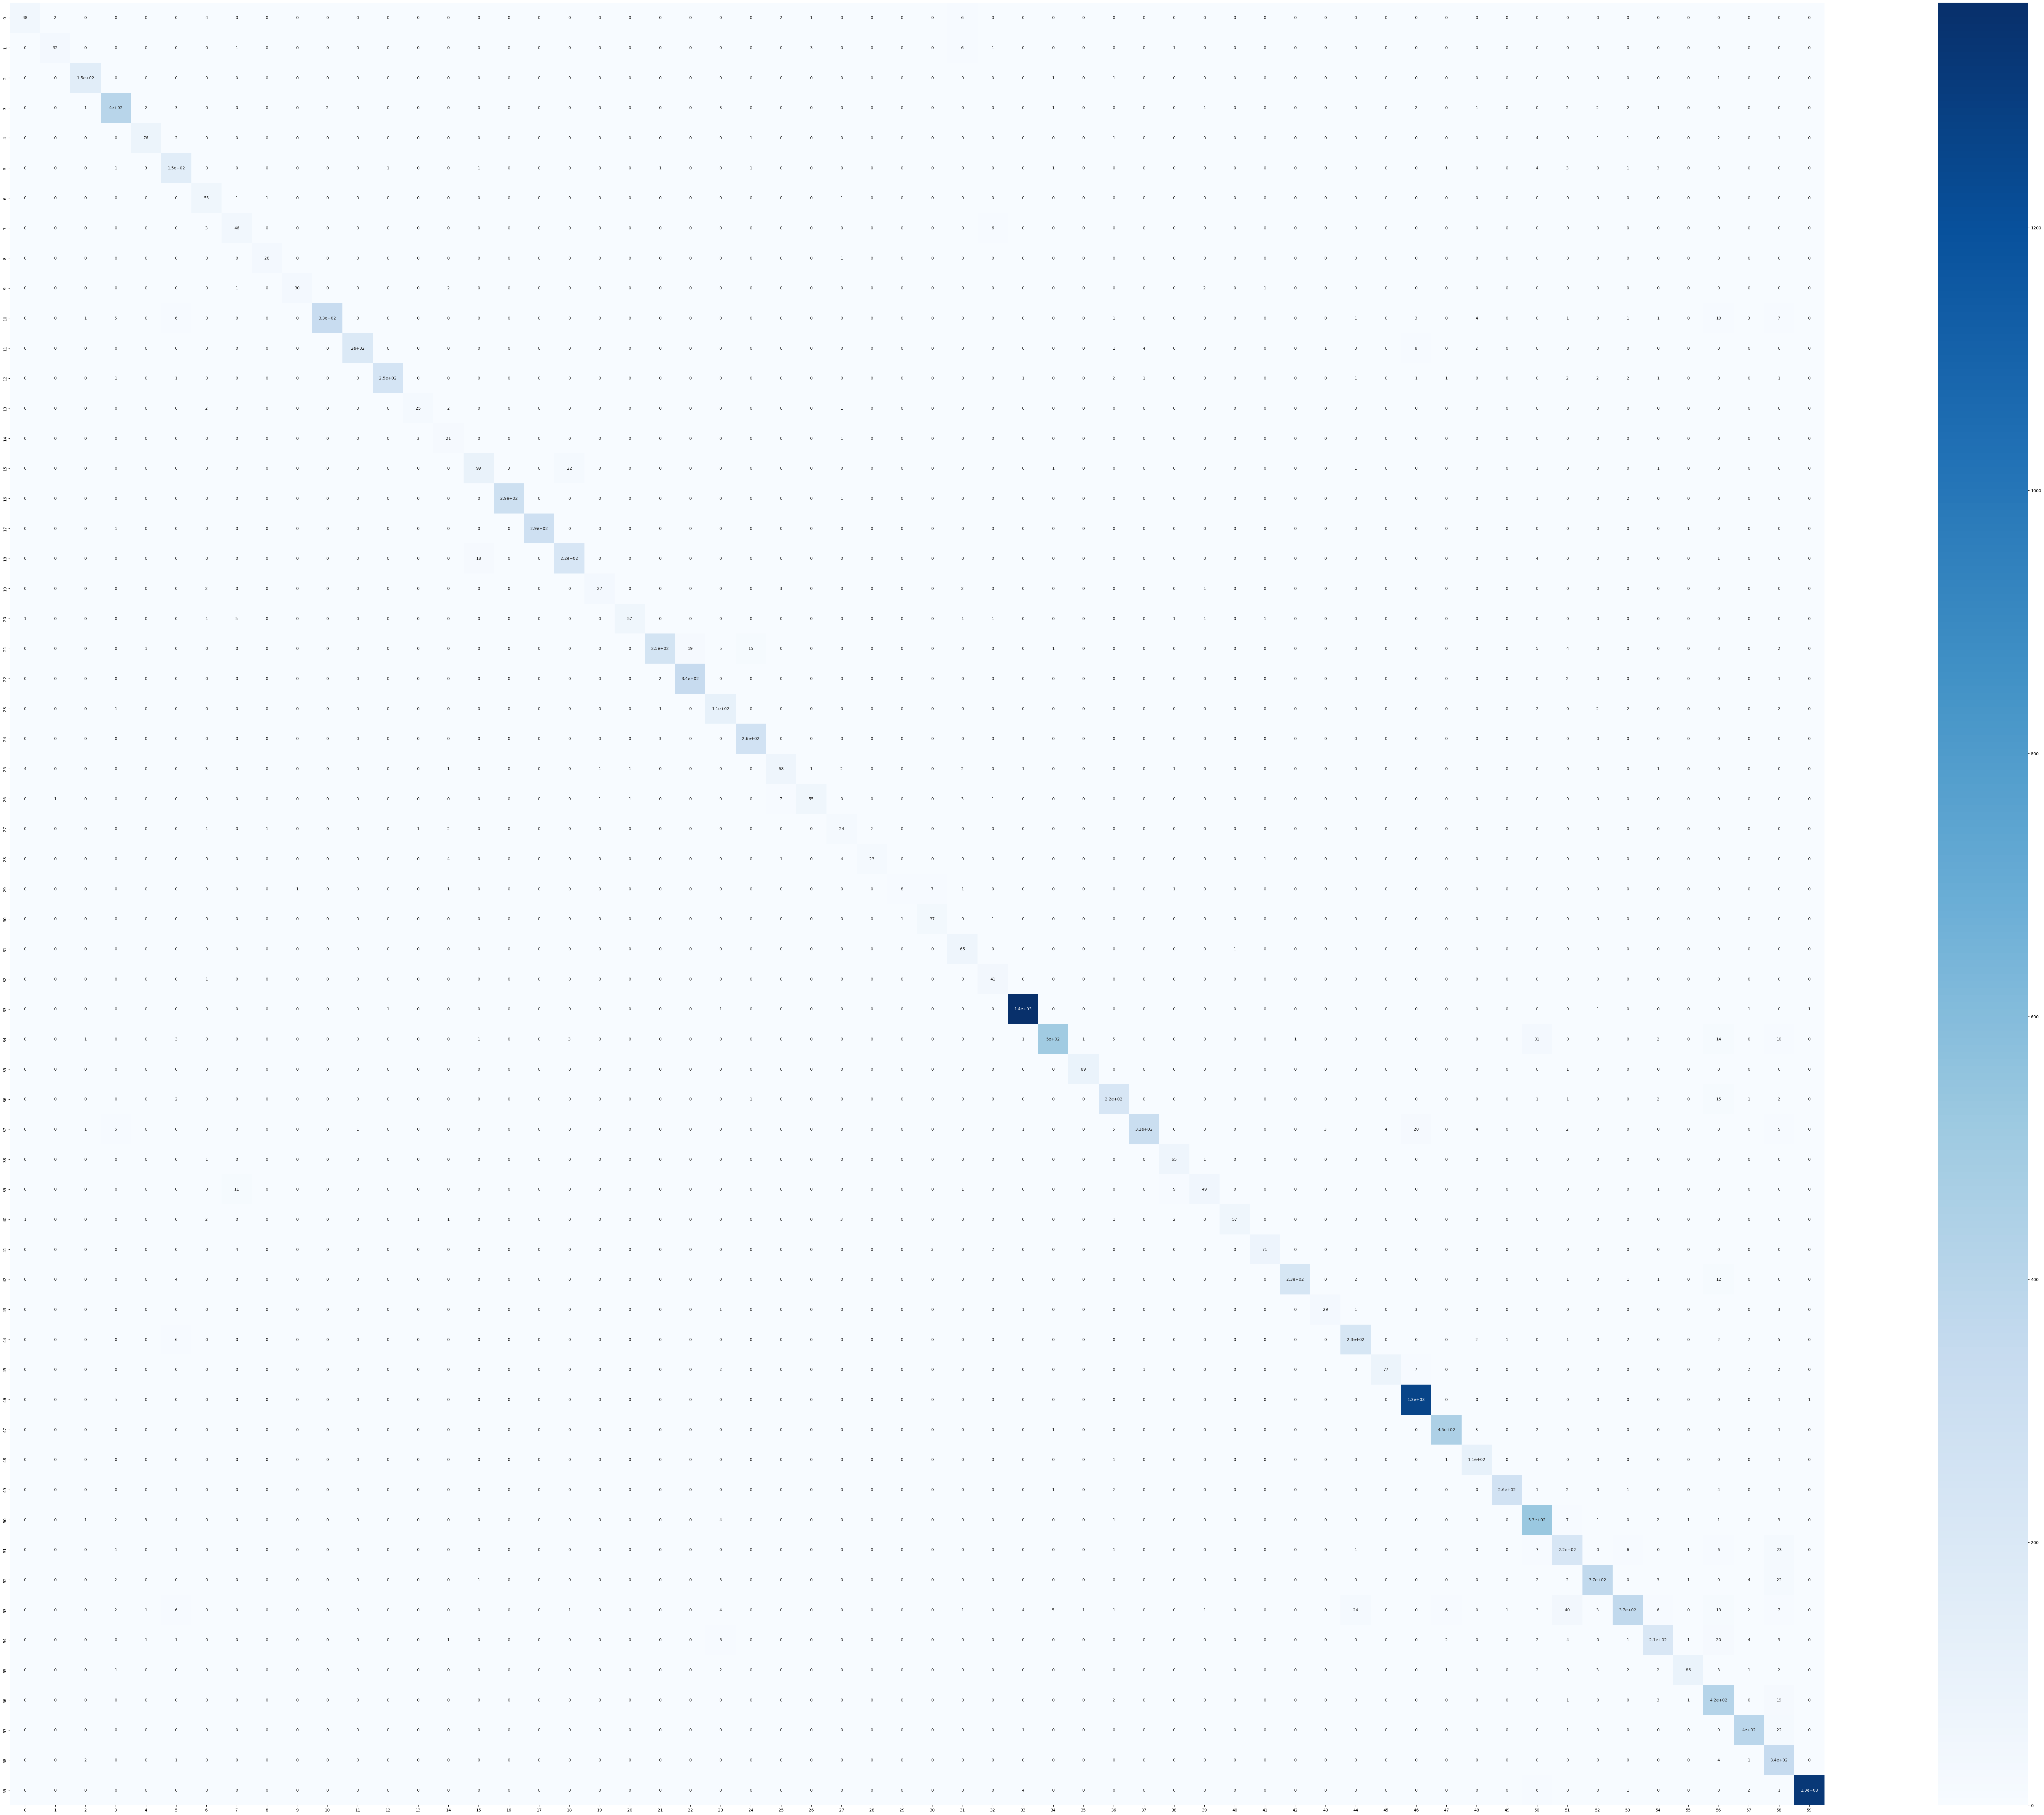

In [10]:


ground_truth, predicted = muts.check_accuracy(val_loader, model, device)

print("Resnet18")
cm = confusion_matrix(ground_truth, predicted)
plt.figure(figsize=(100, 80))
sns.heatmap(cm, annot=True, cmap='Blues')

plt.show()

In [11]:
print("Using micro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='micro')
recall = recall_score(ground_truth, predicted, average='micro')
f1 = f1_score(ground_truth, predicted, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using macro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='macro')
recall = recall_score(ground_truth, predicted, average='macro')
f1 = f1_score(ground_truth, predicted, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using weighted average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='weighted')
recall = recall_score(ground_truth, predicted, average='weighted')
f1 = f1_score(ground_truth, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

Using micro average
Accuracy: 0.9259782170229931
Precision: 0.9259782170229931
Recall: 0.9259782170229931
F1 score: 0.9259782170229931
------------

Using macro average
Accuracy: 0.9259782170229931
Precision: 0.8914559109677198
Recall: 0.8783966912915465
F1 score: 0.8792176481823751
------------

Using weighted average
Accuracy: 0.9259782170229931
Precision: 0.9322530096816498
Recall: 0.9259782170229931
F1 score: 0.9264318628876762
------------



In [12]:
EPOCHS = 5
LR = 1e-3

model = resnet50
model.to(device)
early_stopping = EarlyStopping(patience=5, verbose=True)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.1, patience=5, verbose=True
)

muts.train_model(model,
                 train_loader, 
                 val_loader, 
                 criterion, 
                 optimizer,
                 scheduler, 
                 EPOCHS, 
                 device, 
                 early_stopping,)

  5%|▍         | 64/1303 [4:15:14<23:54:39, 69.47s/it]  

In [ ]:
ground_truth, predicted = muts.check_accuracy(val_loader, model, device)

print("Resnet50")
cm = confusion_matrix(ground_truth, predicted)
plt.figure(figsize=(100, 80))
sns.heatmap(cm, annot=True, cmap='Blues')

plt.show()

In [ ]:
print("Using micro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='micro')
recall = recall_score(ground_truth, predicted, average='micro')
f1 = f1_score(ground_truth, predicted, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using macro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='macro')
recall = recall_score(ground_truth, predicted, average='macro')
f1 = f1_score(ground_truth, predicted, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using weighted average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='weighted')
recall = recall_score(ground_truth, predicted, average='weighted')
f1 = f1_score(ground_truth, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

In [11]:
ground_truth, predicted = muts.check_accuracy(val_loader, model, device)



Checking accuracy on given data


100%|██████████| 465/465 [05:54<00:00,  1.31it/s]

Got 13930 / 14874 with accuracy 93.65
Resnet50


NameError: name 'confusion_matrix' is not defined

Resnet18


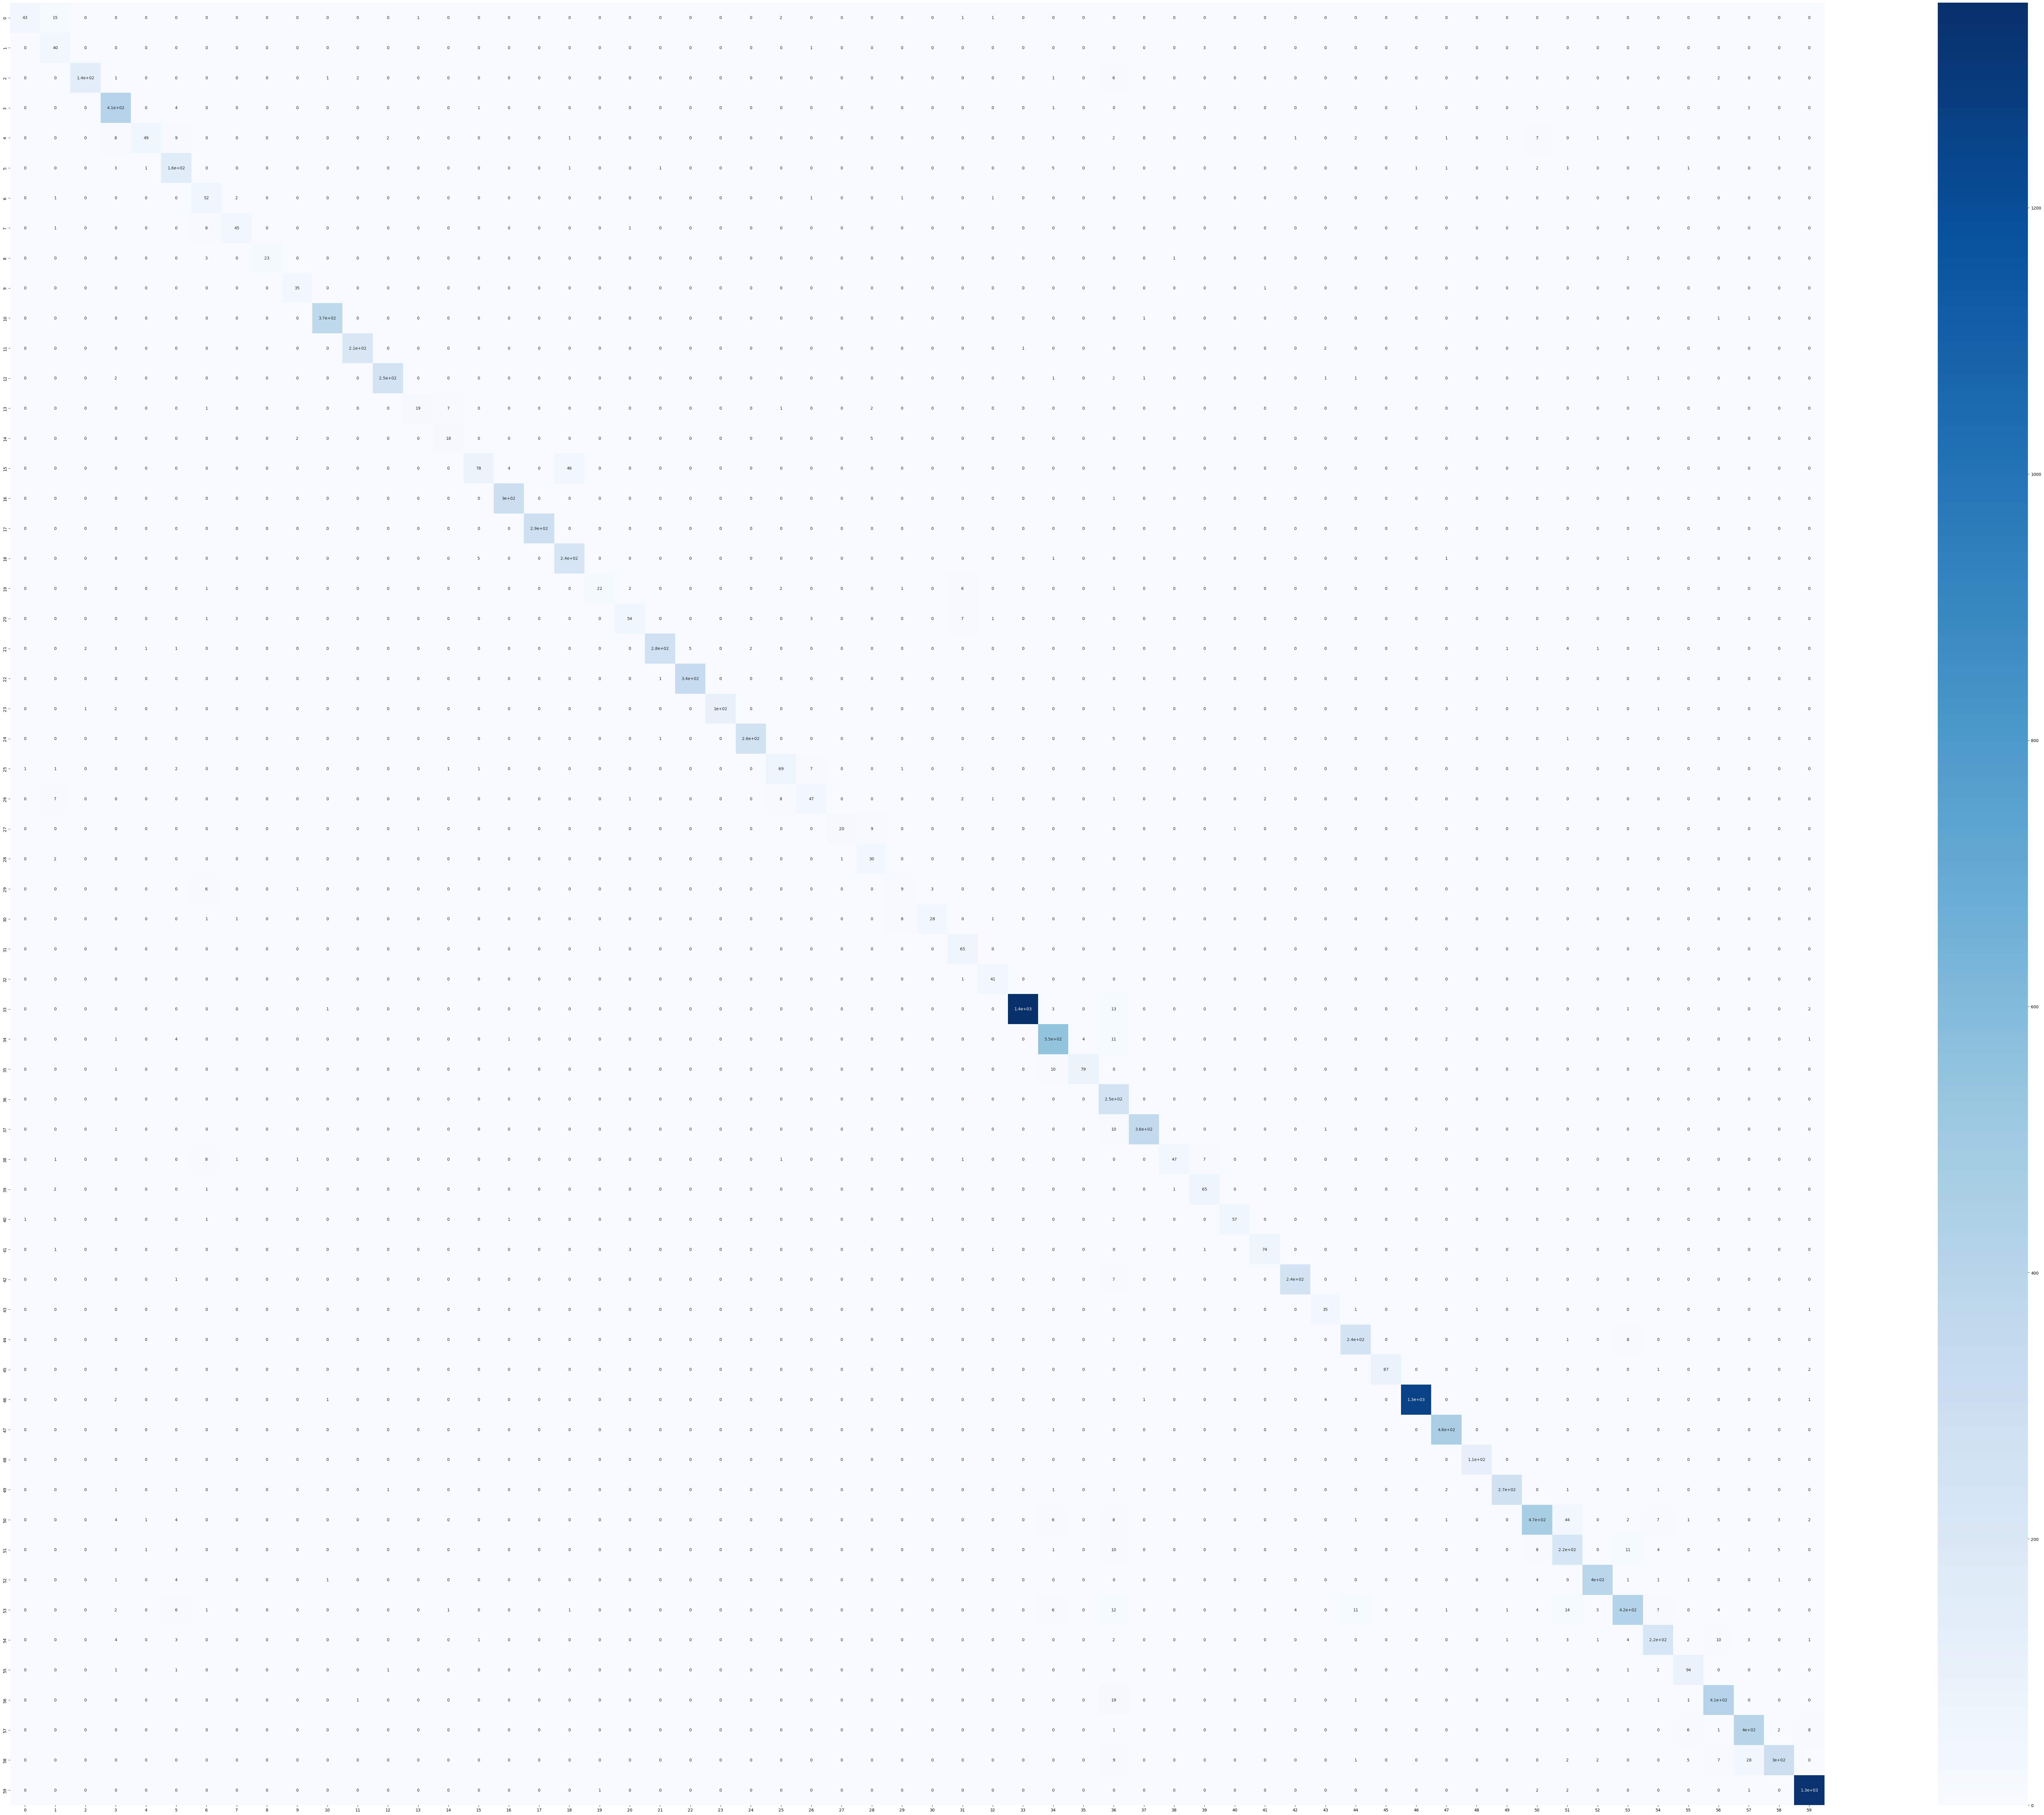

In [13]:
print("Resnet18")
cm = confusion_matrix(ground_truth, predicted)
plt.figure(figsize=(100, 80))
sns.heatmap(cm, annot=True, cmap='Blues')

plt.show()

In [14]:
print("Mobilenet no freeze (total)")
print("Using micro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='micro')
recall = recall_score(ground_truth, predicted, average='micro')
f1 = f1_score(ground_truth, predicted, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using macro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='macro')
recall = recall_score(ground_truth, predicted, average='macro')
f1 = f1_score(ground_truth, predicted, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using weighted average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='weighted')
recall = recall_score(ground_truth, predicted, average='weighted')
f1 = f1_score(ground_truth, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

Mobilenet no freeze (total)
Using micro average
Accuracy: 0.936533548473847
Precision: 0.936533548473847
Recall: 0.936533548473847
F1 score: 0.936533548473847
------------

Using macro average
Accuracy: 0.936533548473847
Precision: 0.8926691960887585
Recall: 0.873644869669827
F1 score: 0.8760409883661633
------------

Using weighted average
Accuracy: 0.936533548473847
Precision: 0.9423180449743788
Recall: 0.936533548473847
F1 score: 0.9368541945541644
------------



In [6]:
EPOCHS = 5
LR = 1e-3

model = Classifier_MBN_V0(n_classes = num_classes, freeze=False)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.1, patience=5, verbose=True
)

early_stopping = EarlyStopping(patience=5, verbose=True, model_name = "MobileNet_Total.pt")


muts.train_model(model,
                 train_loader, 
                 val_loader, 
                 criterion, 
                 optimizer,
                 scheduler, 
                 EPOCHS, 
                 device, 
                 early_stopping,)

100%|██████████| 1303/1303 [18:55<00:00,  1.15it/s]


Cost at epoch 1 is 0.6097696906067174 | valid_loss: 0.40091 | train_loss: 0.60977
Validation loss decreased (inf --> 0.400912).  Saving model ...


100%|██████████| 1303/1303 [18:50<00:00,  1.15it/s]


Cost at epoch 2 is 0.2607866775408242 | valid_loss: 0.19494 | train_loss: 0.26079
Validation loss decreased (0.400912 --> 0.194941).  Saving model ...


100%|██████████| 1303/1303 [17:22<00:00,  1.25it/s]


Cost at epoch 3 is 0.189763954991927 | valid_loss: 0.21400 | train_loss: 0.18976
EarlyStopping counter: 1 out of 5


100%|██████████| 1303/1303 [17:26<00:00,  1.24it/s]


Cost at epoch 4 is 0.1993213277781792 | valid_loss: 0.22917 | train_loss: 0.19932
EarlyStopping counter: 2 out of 5


100%|██████████| 1303/1303 [17:12<00:00,  1.26it/s]


Cost at epoch 5 is 0.16108885513314447 | valid_loss: 0.37893 | train_loss: 0.16109
EarlyStopping counter: 3 out of 5


In [7]:
ground_truth, predicted = muts.check_accuracy(val_loader, model, device)

Checking accuracy on given data


100%|██████████| 465/465 [05:19<00:00,  1.45it/s]

Got 13594 / 14874 with accuracy 91.39


In [8]:
print("Mobilenet no freeze (total)")
print("Using micro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='micro')
recall = recall_score(ground_truth, predicted, average='micro')
f1 = f1_score(ground_truth, predicted, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using macro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='macro')
recall = recall_score(ground_truth, predicted, average='macro')
f1 = f1_score(ground_truth, predicted, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using weighted average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='weighted')
recall = recall_score(ground_truth, predicted, average='weighted')
f1 = f1_score(ground_truth, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

Mobilenet no freeze (total)
Using micro average
Accuracy: 0.9139437945408094
Precision: 0.9139437945408094
Recall: 0.9139437945408094
F1 score: 0.9139437945408094
------------

Using macro average
Accuracy: 0.9139437945408094
Precision: 0.8674053969051291
Recall: 0.862241073177273
F1 score: 0.8519713150243892
------------

Using weighted average
Accuracy: 0.9139437945408094
Precision: 0.9257918806058935
Recall: 0.9139437945408094
F1 score: 0.914344324218375
------------



In [17]:
# Calcular las métricas para cada clase
#clases = encoder.classes_
precision = precision_score(ground_truth, predicted, average=None)
recall = recall_score(ground_truth, predicted, average=None)
f1 = f1_score(ground_truth, predicted, average=None)

# Calcular la precisión global (accuracy)
accuracy = accuracy_score(ground_truth, predicted)

# Imprimir las métricas por clase
for clase in range(num_classes):
    print(f"Clase: {clase}")
    print(f"Precision: {precision[clase]}")
    print(f"Recall: {recall[clase]}")
    print(f"F1-score: {f1[clase]}")
    print("---------")

# Imprimir la precisión global (accuracy)
print(f"Precisión global (Accuracy): {accuracy}")



Clase: 0
Precision: 0.7341772151898734
Recall: 0.9206349206349206
F1-score: 0.8169014084507041
---------
Clase: 1
Precision: 0.7291666666666666
Recall: 0.7954545454545454
F1-score: 0.7608695652173914
---------
Clase: 2
Precision: 0.8651685393258427
Recall: 0.9935483870967742
F1-score: 0.924924924924925
---------
Clase: 3
Precision: 0.9536082474226805
Recall: 0.8685446009389671
F1-score: 0.9090909090909091
---------
Clase: 4
Precision: 0.7903225806451613
Recall: 0.550561797752809
F1-score: 0.6490066225165563
---------
Clase: 5
Precision: 0.7149321266968326
Recall: 0.8977272727272727
F1-score: 0.7959697732997482
---------
Clase: 6
Precision: 0.9722222222222222
Recall: 0.603448275862069
F1-score: 0.7446808510638298
---------
Clase: 7
Precision: 0.8846153846153846
Recall: 0.8363636363636363
F1-score: 0.8598130841121494
---------
Clase: 8
Precision: 0.6571428571428571
Recall: 0.7931034482758621
F1-score: 0.71875
---------
Clase: 9
Precision: 0.918918918918919
Recall: 0.9444444444444444
F1-s

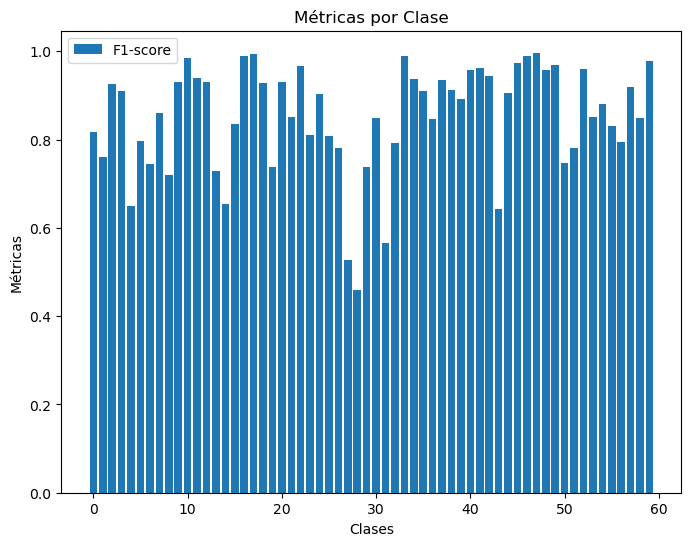

In [26]:

# Listas de clases y métricas
#clases = ['A', 'B', 'C']
#precision = [0.85, 0.92, 0.78]
#recall = [0.92, 0.85, 0.78]
#f1 = [0.88, 0.88, 0.78]

# Crear el gráfico de barras
unique_values = np.unique(Traindf['labels'])
plt.figure(figsize=(8, 6))
#plt.bar(unique_values, precision, label='Precision')
#plt.bar(unique_values, recall, label='Recall')
plt.bar(unique_values, f1, label='F1-score')
plt.xlabel('Clases')
plt.ylabel('Métricas')
plt.title('Métricas por Clase')
plt.legend()
plt.show()

### Augmenting Data

In [6]:
batch_size = 32 
num_classes = 60
general_transforms = transforms.Compose(
    [   
        transforms.Resize((224, 224)),
        transforms.Lambda(lambda x: x.convert('RGB')),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]
        ),
    ]
)


import torchvision.transforms.functional as TF
import random

class MyRotationTransform:
    """Rotate by one of the given angles."""

    def __init__(self, angles):
        self.angles = angles

    def __call__(self, x):
        angle = random.choice(self.angles)
        return TF.rotate(x, angle)



augmenting_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    MyRotationTransform([90, 180, 270]),
    transforms.Lambda(lambda x: x.convert('RGB')),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


train_dataset = MaskDatasetAugmented(
    csv_file=os.path.join(ROOT_THIS_DIR, "TrainClf.csv"),
    root_dir=ROOT_THIS_DIR,
    general_transforms=general_transforms,
    augmenting_transforms=augmenting_transforms,

)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size, shuffle=True)

val_dataset = MaskDataset(
    csv_file=os.path.join(ROOT_THIS_DIR, "ValClf.csv"),
    root_dir=ROOT_THIS_DIR,
    transform=general_transforms,

)

val_loader = DataLoader(dataset=val_dataset,
                         batch_size=batch_size, shuffle=True)

In [6]:
EPOCHS = 5
LR = 1e-3

model = Classifier_MBN_V0(n_classes = num_classes, freeze=False)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.1, patience=5, verbose=True
)

early_stopping = EarlyStopping(patience=5, verbose=True, model_name = "MobileNet_Total_Augment.pt")


muts.train_model(model,
                 train_loader, 
                 val_loader, 
                 criterion, 
                 optimizer,
                 scheduler, 
                 EPOCHS, 
                 device, 
                 early_stopping,)

c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 3911/3911 [1:56:20<00:00,  1.78s/it]  


Cost at epoch 1 is 0.574026142109085 | valid_loss: 0.34782 | train_loss: 0.57403
Validation loss decreased (inf --> 0.347818).  Saving model ...


100%|██████████| 3911/3911 [1:56:53<00:00,  1.79s/it]  


Cost at epoch 2 is 0.28366890973566816 | valid_loss: 0.21412 | train_loss: 0.28367
Validation loss decreased (0.347818 --> 0.214116).  Saving model ...


100%|██████████| 3911/3911 [1:57:22<00:00,  1.80s/it]  


Cost at epoch 3 is 0.2330887734650434 | valid_loss: 0.22121 | train_loss: 0.23309
EarlyStopping counter: 1 out of 5


 60%|██████    | 2360/3911 [1:17:58<51:14,  1.98s/it]  


KeyboardInterrupt: 

In [5]:
EPOCHS = 10
LR = 1e-3

model = Classifier_MBN_V0(n_classes = num_classes, freeze=False)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.1, patience=5, verbose=True
)

early_stopping = EarlyStopping(patience=5, verbose=True, model_name = "MobileNet_Total_Augment2.pt")


muts.train_model(model,
                 train_loader, 
                 val_loader, 
                 criterion, 
                 optimizer,
                 scheduler, 
                 EPOCHS, 
                 device, 
                 early_stopping,)

c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 3911/3911 [2:12:13<00:00,  2.03s/it]  


Cost at epoch 1 is 0.5740855487030904 | valid_loss: 0.31568 | train_loss: 0.57409
Validation loss decreased (inf --> 0.315681).  Saving model ...


100%|██████████| 3911/3911 [2:12:37<00:00,  2.03s/it]  


Cost at epoch 2 is 0.2864551493274177 | valid_loss: 0.40836 | train_loss: 0.28646
EarlyStopping counter: 1 out of 5


100%|██████████| 3911/3911 [2:12:43<00:00,  2.04s/it]  


Cost at epoch 3 is 0.23878079846753128 | valid_loss: 0.25856 | train_loss: 0.23878
Validation loss decreased (0.315681 --> 0.258558).  Saving model ...


100%|██████████| 3911/3911 [2:12:26<00:00,  2.03s/it]  


Cost at epoch 4 is 0.19213951485286937 | valid_loss: 0.34874 | train_loss: 0.19214
EarlyStopping counter: 1 out of 5


100%|██████████| 3911/3911 [2:12:40<00:00,  2.04s/it]  


Cost at epoch 5 is 0.16807864281203724 | valid_loss: 0.30402 | train_loss: 0.16808
EarlyStopping counter: 2 out of 5


100%|██████████| 3911/3911 [2:12:47<00:00,  2.04s/it]  


Cost at epoch 6 is 0.15792215449728847 | valid_loss: 0.15760 | train_loss: 0.15792
Validation loss decreased (0.258558 --> 0.157600).  Saving model ...


 25%|██▌       | 994/3911 [34:08<1:40:12,  2.06s/it]


KeyboardInterrupt: 

: 

In [8]:
model_file_name = "MobileNet_Total_Augment.pt"
model_saved_path = os.path.join("models","checkpoints",model_file_name)
checkpoint = torch.load(model_saved_path)

num_classes = 60
model = Classifier_MBN_V0(n_classes = num_classes)
model.to(device)
model.load_state_dict(checkpoint['model_state_dict'])

c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [10]:
ground_truth, predicted = muts.check_accuracy(val_loader, model, device)
print("Mobilenet no freeze Augmented v1")
print("Using micro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='micro')
recall = recall_score(ground_truth, predicted, average='micro')
f1 = f1_score(ground_truth, predicted, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using macro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='macro')
recall = recall_score(ground_truth, predicted, average='macro')
f1 = f1_score(ground_truth, predicted, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using weighted average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='weighted')
recall = recall_score(ground_truth, predicted, average='weighted')
f1 = f1_score(ground_truth, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

Mobilenet no freeze Augmented v1
Using micro average
Accuracy: 0.9428533010622563
Precision: 0.9428533010622563
Recall: 0.9428533010622563
F1 score: 0.9428533010622563
------------

Using macro average
Accuracy: 0.9428533010622563
Precision: 0.906728823160088
Recall: 0.9147914347474846
F1 score: 0.9033967117499173
------------

Using weighted average
Accuracy: 0.9428533010622563
Precision: 0.9494085985684612
Recall: 0.9428533010622563
F1 score: 0.9436331083980679
------------



In [11]:
# Calcular las métricas para cada clase
#clases = encoder.classes_
precision = precision_score(ground_truth, predicted, average=None)
recall = recall_score(ground_truth, predicted, average=None)
f1 = f1_score(ground_truth, predicted, average=None)

# Calcular la precisión global (accuracy)
accuracy = accuracy_score(ground_truth, predicted)

# Imprimir las métricas por clase
for clase in range(num_classes):
    print(f"Clase: {clase}")
    print(f"Precision: {precision[clase]}")
    print(f"Recall: {recall[clase]}")
    print(f"F1-score: {f1[clase]}")
    print("---------")

# Imprimir la precisión global (accuracy)
print(f"Precisión global (Accuracy): {accuracy}")

Clase: 0
Precision: 1.0
Recall: 0.5873015873015873
F1-score: 0.74
---------
Clase: 1
Precision: 0.6153846153846154
Recall: 0.9090909090909091
F1-score: 0.7339449541284404
---------
Clase: 2
Precision: 0.9554140127388535
Recall: 0.967741935483871
F1-score: 0.9615384615384616
---------
Clase: 3
Precision: 0.8755274261603375
Recall: 0.9741784037558685
F1-score: 0.9222222222222222
---------
Clase: 4
Precision: 0.7717391304347826
Recall: 0.797752808988764
F1-score: 0.7845303867403315
---------
Clase: 5
Precision: 0.806930693069307
Recall: 0.9261363636363636
F1-score: 0.8624338624338624
---------
Clase: 6
Precision: 0.9433962264150944
Recall: 0.8620689655172413
F1-score: 0.9009009009009009
---------
Clase: 7
Precision: 0.8793103448275862
Recall: 0.9272727272727272
F1-score: 0.902654867256637
---------
Clase: 8
Precision: 1.0
Recall: 1.0
F1-score: 1.0
---------
Clase: 9
Precision: 0.9
Recall: 1.0
F1-score: 0.9473684210526316
---------
Clase: 10
Precision: 1.0
Recall: 0.8986666666666666
F1-sco

In [ ]:
# Lista para almacenar las matrices de confusión binarias
binary_matrices = []

# Imprimir las métricas por clase y almacenar las matrices binarias en la lista
for clase in range(num_classes):
    print(f"Clase: {clase}")
    print(f"Precision: {precision[clase]}")
    print(f"Recall: {recall[clase]}")
    print(f"F1-score: {f1[clase]}")
    print("---------")
    
    # Crear matriz de confusión binaria para la clase actual
    binary_matrix = np.zeros((2, 2))
    binary_matrix[0, 0] = cm[clase, clase]  # Verdaderos positivos
    binary_matrix[0, 1] = cm[clase, :].sum() - cm[clase, clase]  # Falsos negativos
    binary_matrix[1, 0] = cm[:, clase].sum() - cm[clase, clase]  # Falsos positivos
    binary_matrix[1, 1] = cm.sum() - binary_matrix[0, 0] - binary_matrix[0, 1] - binary_matrix[1, 0]  # Verdaderos negativos
    binary_matrices.append(binary_matrix)
    
    # Mostrar la matriz de confusión binaria con Seaborn
    sns.heatmap(binary_matrix, annot=True, cmap='Blues', xticklabels=['Clase', 'Todas las demás clases'], yticklabels=['Clase', 'Todas las demás clases'])
    plt.title(f"Matriz de Confusión - Clase {clase}")
    plt.xlabel("Predicted")
    plt.ylabel("Ground Truth")
    plt.show()

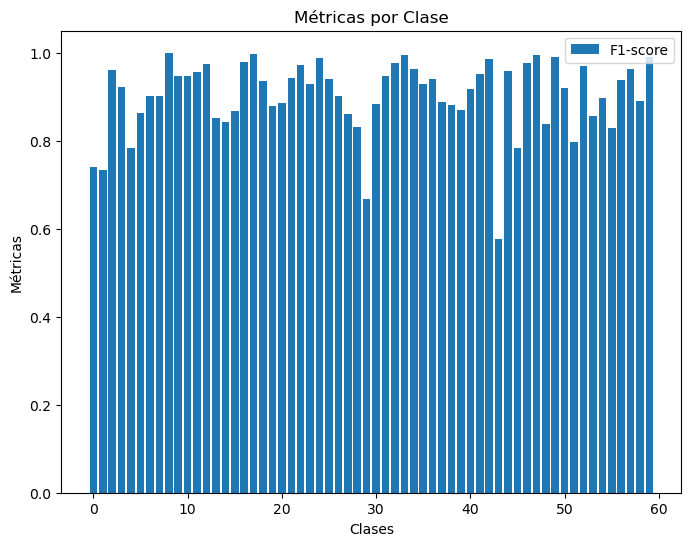

In [26]:
# Crear el gráfico de barras
unique_values = np.unique(Traindf['labels'])
plt.figure(figsize=(8, 6))
#plt.bar(unique_values, precision, label='Precision')
#plt.bar(unique_values, recall, label='Recall')
plt.bar(unique_values, f1, label='F1-score')
plt.xlabel('Clases')
plt.ylabel('Métricas')
plt.title('Métricas por Clase')
plt.legend()
plt.show()

In [17]:
classes = os.listdir('data/data_classification/')

In [27]:
ordenada = sorted(enumerate(f1), key=lambda x: x[1])

# Recuperar la lista ordenada y los índices originales
lista_ordenada = [x[1] for x in ordenada]
indices_originales = [x[0] for x in ordenada]

# Imprimir la lista ordenada y los índices originales
print("Lista ordenada:", lista_ordenada)
print("Índices originales:", indices_originales)

Lista ordenada: [0.5757575757575757, 0.6666666666666666, 0.7339449541284404, 0.74, 0.7829787234042553, 0.7845303867403315, 0.7979274611398964, 0.8290598290598291, 0.8307692307692308, 0.8383838383838385, 0.8421052631578947, 0.8518518518518519, 0.8571428571428572, 0.8615384615384616, 0.8624338624338624, 0.8669201520912547, 0.8695652173913044, 0.8787878787878788, 0.8811188811188811, 0.8837209302325582, 0.8854961832061068, 0.8885542168674699, 0.8905775075987842, 0.8964143426294822, 0.9009009009009009, 0.9022556390977444, 0.902654867256637, 0.9178082191780821, 0.9188712522045855, 0.9222222222222222, 0.9282700421940928, 0.9294117647058824, 0.9362549800796813, 0.937219730941704, 0.9402697495183044, 0.9411764705882352, 0.9428571428571428, 0.946629213483146, 0.9473684210526316, 0.9473684210526316, 0.9506172839506174, 0.9565217391304348, 0.9595141700404858, 0.9615384615384616, 0.963096309630963, 0.963855421686747, 0.969173859432799, 0.9732142857142857, 0.9748549323017408, 0.9761904761904762, 0.9

In [32]:
idx_to_report = [43, 29, 1, 0, 45, 4, 51, 55, 28, 48, 14, 13, 53, 27, 5, 15]
for idx in idx_to_report:
    print('Clase : {} --- f1 : {} --- prec : {} --- recall : {}'.format(classes[idx], round(f1[idx],3), round(precision[idx],3), round(recall[idx],3)))

Clase : Potato_healthy --- f1 : 0.576 --- prec : 0.404 --- recall : 1.0
Clase : Lemon_diseased --- f1 : 0.667 --- prec : 0.909 --- recall : 0.526
Clase : Alstonia_scholaris_healthy --- f1 : 0.734 --- prec : 0.615 --- recall : 0.909
Clase : Alstonia_scholaris_diseased --- f1 : 0.74 --- prec : 1.0 --- recall : 0.587
Clase : Raspberry_healthy --- f1 : 0.783 --- prec : 0.643 --- recall : 1.0
Clase : Apple_rust --- f1 : 0.785 --- prec : 0.772 --- recall : 0.798
Clase : Tomato_early_blight --- f1 : 0.798 --- prec : 0.745 --- recall : 0.859
Clase : Tomato_mosaic_virus --- f1 : 0.829 --- prec : 0.752 --- recall : 0.924
Clase : Jatropha_healthy --- f1 : 0.831 --- prec : 0.844 --- recall : 0.818
Clase : Strawberry_healthy --- f1 : 0.838 --- prec : 0.988 --- recall : 0.728
Clase : Chinar_healthy --- f1 : 0.842 --- prec : 0.75 --- recall : 0.96
Clase : Chinar_diseased --- f1 : 0.852 --- prec : 0.958 --- recall : 0.767
Clase : Tomato_late_blight --- f1 : 0.857 --- prec : 0.954 --- recall : 0.778
Cl

In [33]:
model_file_name = "MobileNet_Total_Augment2.pt"
model_saved_path = os.path.join("models","checkpoints",model_file_name)
checkpoint = torch.load(model_saved_path)

num_classes = 60
model = Classifier_MBN_V0(n_classes = num_classes)
model.to(device)
model.load_state_dict(checkpoint['model_state_dict'])

c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<All keys matched successfully>

In [34]:
ground_truth, predicted = muts.check_accuracy(val_loader, model, device)
print("Mobilenet no freeze Augmented v1")
print("Using micro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='micro')
recall = recall_score(ground_truth, predicted, average='micro')
f1 = f1_score(ground_truth, predicted, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using macro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='macro')
recall = recall_score(ground_truth, predicted, average='macro')
f1 = f1_score(ground_truth, predicted, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using weighted average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='weighted')
recall = recall_score(ground_truth, predicted, average='weighted')
f1 = f1_score(ground_truth, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

Checking accuracy on given data


100%|██████████| 465/465 [05:37<00:00,  1.38it/s]


Got 14283 / 14874 with accuracy 96.03
Mobilenet no freeze Augmented v1
Using micro average
Accuracy: 0.9602662363856393
Precision: 0.9602662363856393
Recall: 0.9602662363856393
F1 score: 0.9602662363856393
------------

Using macro average
Accuracy: 0.9602662363856393
Precision: 0.937936587543563
Recall: 0.9374266515317209
F1 score: 0.9354219978824845
------------

Using weighted average
Accuracy: 0.9602662363856393
Precision: 0.9619123577316495
Recall: 0.9602662363856393
F1 score: 0.960245518856286
------------



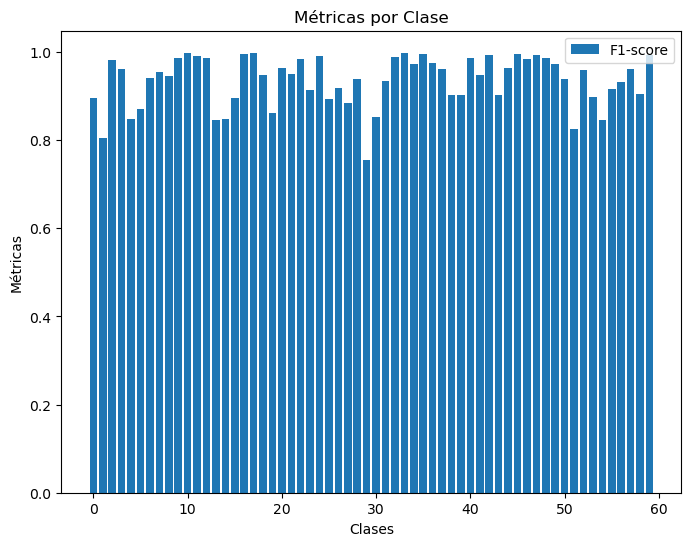

In [44]:
# Crear el gráfico de barras
unique_values = np.unique(Traindf['labels'])
plt.figure(figsize=(8, 6))
#plt.bar(unique_values, precision, label='Precision')
#plt.bar(unique_values, recall, label='Recall')
plt.bar(unique_values, f1, label='F1-score')
plt.xlabel('Clases')
plt.ylabel('Métricas')
plt.title('Métricas por Clase')
plt.legend()
plt.show()

In [35]:
# Calcular las métricas para cada clase
#clases = encoder.classes_
precision = precision_score(ground_truth, predicted, average=None)
recall = recall_score(ground_truth, predicted, average=None)
f1 = f1_score(ground_truth, predicted, average=None)

# Calcular la precisión global (accuracy)
accuracy = accuracy_score(ground_truth, predicted)

# Imprimir las métricas por clase
for clase in range(num_classes):
    print(f"Clase: {clase}")
    print(f"Precision: {precision[clase]}")
    print(f"Recall: {recall[clase]}")
    print(f"F1-score: {f1[clase]}")
    print("---------")

# Imprimir la precisión global (accuracy)
print(f"Precisión global (Accuracy): {accuracy}")

Clase: 0
Precision: 0.9032258064516129
Recall: 0.8888888888888888
F1-score: 0.8959999999999999
---------
Clase: 1
Precision: 0.7358490566037735
Recall: 0.8863636363636364
F1-score: 0.8041237113402062
---------
Clase: 2
Precision: 0.9685534591194969
Recall: 0.9935483870967742
F1-score: 0.980891719745223
---------
Clase: 3
Precision: 0.969047619047619
Recall: 0.9553990610328639
F1-score: 0.9621749408983451
---------
Clase: 4
Precision: 0.9710144927536232
Recall: 0.7528089887640449
F1-score: 0.8481012658227848
---------
Clase: 5
Precision: 0.8449197860962567
Recall: 0.8977272727272727
F1-score: 0.8705234159779615
---------
Clase: 6
Precision: 0.9322033898305084
Recall: 0.9482758620689655
F1-score: 0.94017094017094
---------
Clase: 7
Precision: 0.9629629629629629
Recall: 0.9454545454545454
F1-score: 0.9541284403669724
---------
Clase: 8
Precision: 1.0
Recall: 0.896551724137931
F1-score: 0.9454545454545454
---------
Clase: 9
Precision: 0.972972972972973
Recall: 1.0
F1-score: 0.9863013698630

In [36]:
ordenada = sorted(enumerate(f1), key=lambda x: x[1])

# Recuperar la lista ordenada y los índices originales
lista_ordenada = [x[1] for x in ordenada]
indices_originales = [x[0] for x in ordenada]

# Imprimir la lista ordenada y los índices originales
print("Lista ordenada:", lista_ordenada)
print("Índices originales:", indices_originales)

Lista ordenada: [0.7555555555555555, 0.8041237113402062, 0.8258317025440313, 0.846153846153846, 0.8464419475655431, 0.8474576271186441, 0.8481012658227848, 0.8533333333333333, 0.8611111111111112, 0.8705234159779615, 0.8852459016393444, 0.8941176470588236, 0.8953068592057762, 0.8959999999999999, 0.8969957081545065, 0.9014084507042254, 0.9016393442622952, 0.9019607843137255, 0.9042553191489362, 0.9142857142857143, 0.9158878504672897, 0.9172932330827068, 0.9316909294512877, 0.935251798561151, 0.9390681003584229, 0.9393939393939394, 0.94017094017094, 0.9454545454545454, 0.9473684210526316, 0.9475890985324947, 0.9508716323296356, 0.9541284403669724, 0.9598051157125458, 0.9606741573033708, 0.9611650485436893, 0.9621749408983451, 0.964, 0.9645390070921985, 0.9718309859154929, 0.9735720375106564, 0.9759036144578314, 0.980891719745223, 0.9838472834067548, 0.9848778596355175, 0.9852941176470589, 0.9863013698630138, 0.9865125240847785, 0.9867841409691629, 0.9879518072289156, 0.9906103286384976, 0

In [39]:
idx_to_report = indices_originales[:15]
for idx in idx_to_report:
    print('Clase : {} --- f1 : {} --- prec : {} --- recall : {}'.format(classes[idx], round(f1[idx],3), round(precision[idx],3), round(recall[idx],3)))

Clase : Lemon_diseased --- f1 : 0.756 --- prec : 0.654 --- recall : 0.895
Clase : Alstonia_scholaris_healthy --- f1 : 0.804 --- prec : 0.736 --- recall : 0.886
Clase : Tomato_early_blight --- f1 : 0.826 --- prec : 0.872 --- recall : 0.784
Clase : Chinar_diseased --- f1 : 0.846 --- prec : 1.0 --- recall : 0.733
Clase : Tomato_leaf_Mold --- f1 : 0.846 --- prec : 0.819 --- recall : 0.876
Clase : Chinar_healthy --- f1 : 0.847 --- prec : 0.735 --- recall : 1.0
Clase : Apple_rust --- f1 : 0.848 --- prec : 0.971 --- recall : 0.753
Clase : Lemon_healthy --- f1 : 0.853 --- prec : 0.889 --- recall : 0.821
Clase : Gauva_diseased --- f1 : 0.861 --- prec : 0.838 --- recall : 0.886
Clase : Apple_scab --- f1 : 0.871 --- prec : 0.845 --- recall : 0.898
Clase : Jatropha_diseased --- f1 : 0.885 --- prec : 0.9 --- recall : 0.871
Clase : Jamun_diseased --- f1 : 0.894 --- prec : 0.905 --- recall : 0.884
Clase : Corn_cercospora_leaf_spot --- f1 : 0.895 --- prec : 0.832 --- recall : 0.969
Clase : Alstonia_sc

In [46]:
idx_to_report = indices_originales[-45:]
for idx in idx_to_report:
    print('Clase : {} --- f1 : {} --- prec : {} --- recall : {}'.format(classes[idx], round(f1[idx],3), round(precision[idx],3), round(recall[idx],3)))

Clase : Potato_healthy --- f1 : 0.901 --- prec : 0.97 --- recall : 0.842
Clase : Pomegranate_diseased --- f1 : 0.902 --- prec : 1.0 --- recall : 0.821
Clase : Pomegranate_healthy --- f1 : 0.902 --- prec : 0.841 --- recall : 0.972
Clase : Tomato_target_Spot --- f1 : 0.904 --- prec : 0.848 --- recall : 0.969
Clase : Grape_healthy --- f1 : 0.914 --- prec : 0.889 --- recall : 0.941
Clase : Tomato_mosaic_virus --- f1 : 0.916 --- prec : 0.899 --- recall : 0.933
Clase : Jamun_healthy --- f1 : 0.917 --- prec : 0.953 --- recall : 0.884
Clase : Tomato_septoria_leaf_spot --- f1 : 0.932 --- prec : 0.922 --- recall : 0.941
Clase : Mango_diseased --- f1 : 0.935 --- prec : 0.89 --- recall : 0.985
Clase : Tomato_bacterial_spot --- f1 : 0.939 --- prec : 0.941 --- recall : 0.937
Clase : Jatropha_healthy --- f1 : 0.939 --- prec : 0.939 --- recall : 0.939
Clase : Arjun_diseased --- f1 : 0.94 --- prec : 0.932 --- recall : 0.948
Clase : Bael_diseased --- f1 : 0.945 --- prec : 1.0 --- recall : 0.897
Clase : 

In [ ]:
# Lista para almacenar las matrices de confusión binarias
binary_matrices = []

# Imprimir las métricas por clase y almacenar las matrices binarias en la lista
for clase in range(num_classes):
    print(f"Clase: {clase}")
    print(f"Precision: {precision[clase]}")
    print(f"Recall: {recall[clase]}")
    print(f"F1-score: {f1[clase]}")
    print("---------")
    
    # Crear matriz de confusión binaria para la clase actual
    binary_matrix = np.zeros((2, 2))
    binary_matrix[0, 0] = cm[clase, clase]  # Verdaderos positivos
    binary_matrix[0, 1] = cm[clase, :].sum() - cm[clase, clase]  # Falsos negativos
    binary_matrix[1, 0] = cm[:, clase].sum() - cm[clase, clase]  # Falsos positivos
    binary_matrix[1, 1] = cm.sum() - binary_matrix[0, 0] - binary_matrix[0, 1] - binary_matrix[1, 0]  # Verdaderos negativos
    binary_matrices.append(binary_matrix)
    
    # Mostrar la matriz de confusión binaria con Seaborn
    sns.heatmap(binary_matrix, annot=True, cmap='Blues', xticklabels=['Clase', 'Todas las demás clases'], yticklabels=['Clase', 'Todas las demás clases'])
    plt.title(f"Matriz de Confusión - Clase {clase}")
    plt.xlabel("Predicted")
    plt.ylabel("Ground Truth")
    plt.show()

In [48]:
general_transforms = transforms.Compose(
    [   
        transforms.Resize((224, 224)),
        transforms.Lambda(lambda x: x.convert('RGB')),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]
        ),
    ]
)

test_dataset = MaskDataset(
    csv_file=os.path.join(ROOT_THIS_DIR, "TestClf.csv"),
    root_dir=ROOT_THIS_DIR,
    transform=general_transforms,

)

test_loader = DataLoader(dataset=test_dataset,
                         batch_size=batch_size, shuffle=True)

In [49]:
ground_truth, predicted = muts.check_accuracy(test_loader, model, device)
print("Mobilenet no freeze Augmented v1")
print("Using micro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='micro')
recall = recall_score(ground_truth, predicted, average='micro')
f1 = f1_score(ground_truth, predicted, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using macro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='macro')
recall = recall_score(ground_truth, predicted, average='macro')
f1 = f1_score(ground_truth, predicted, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using weighted average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='weighted')
recall = recall_score(ground_truth, predicted, average='weighted')
f1 = f1_score(ground_truth, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

Checking accuracy on given data


100%|██████████| 95/95 [01:21<00:00,  1.17it/s]

Got 2906 / 3033 with accuracy 95.81
Mobilenet no freeze Augmented v1
Using micro average
Accuracy: 0.958127266732608
Precision: 0.958127266732608
Recall: 0.958127266732608
F1 score: 0.958127266732608
------------

Using macro average
Accuracy: 0.958127266732608
Precision: 0.938349707262233
Recall: 0.9350204137033233
F1 score: 0.9329866788174666
------------

Using weighted average
Accuracy: 0.958127266732608
Precision: 0.9609541659839279
Recall: 0.958127266732608
F1 score: 0.9582284197293283
------------



In [ ]:
# Crear el gráfico de barras
unique_values = np.unique(Traindf['labels'])
plt.figure(figsize=(8, 6))
#plt.bar(unique_values, precision, label='Precision')
#plt.bar(unique_values, recall, label='Recall')
plt.bar(unique_values, f1, label='F1-score')
plt.xlabel('Clases')
plt.ylabel('Métricas')
plt.title('Métricas por Clase')
plt.legend()
plt.show()

In [ ]:
# Calcular las métricas para cada clase
#clases = encoder.classes_
precision = precision_score(ground_truth, predicted, average=None)
recall = recall_score(ground_truth, predicted, average=None)
f1 = f1_score(ground_truth, predicted, average=None)

# Calcular la precisión global (accuracy)
accuracy = accuracy_score(ground_truth, predicted)

# Imprimir las métricas por clase
for clase in range(num_classes):
    print(f"Clase: {clase}")
    print(f"Precision: {precision[clase]}")
    print(f"Recall: {recall[clase]}")
    print(f"F1-score: {f1[clase]}")
    print("---------")

# Imprimir la precisión global (accuracy)
print(f"Precisión global (Accuracy): {accuracy}")

In [ ]:
model_saved_path = "Model_MobileNet_V1.pt"
checkpoint = torch.load(model_saved_path)

num_classes = 60
model = Classifier_MBN_V0(n_classes = num_classes)

model.load_state_dict(checkpoint['model_state_dict'])

### Filtering 16 classes

In [45]:
all_classes = os.listdir('data\data_classification')

In [2]:
filtered_classes = ['Apple_black_rot', 
                    'Apple_healthy', 
                    'Apple_rust', 
                    'Apple_scab',
                    'Blueberry_healthy', 
                    'Cherry_healthy', 
                    'Cherry_powdery_mildew',
                    'Corn_cercospora_leaf_spot',
                    'Corn_common_rust',
                    'Corn_healthy',
                    'Corn_northern_leaf_blight',
                    'Gauva_diseased',
                    'Gauva_healthy',
                    'Grape_black_rot',
                    'Grape_esca',
                    'Grape_healthy',
                    'Grape_leaf_blight',
                    'Lemon_diseased',
                    'Lemon_healthy',
                    'Mango_diseased',
                    'Mango_healthy',
                    'Orange_haunglongbing',
                    'Peach_bacterial_spot',
                    'Peach_healthy',
                    'Pepper_bell_bacterial_spot',
                    'Pepper_bell_healthy',
                    'Pomegranate_diseased',
                    'Pomegranate_healthy',
                    'Potato_early_blight',
                    'Potato_healthy',
                    'Potato_late_blight',
                    'Raspberry_healthy',
                    'Strawberry_healthy',
                    'Strawberry_leaf_scorch',
                    'Tomato_bacterial_spot',
                    'Tomato_early_blight',
                    'Tomato_healthy',
                    'Tomato_late_blight',
                    'Tomato_leaf_Mold',
                    'Tomato_mosaic_virus',
                    'Tomato_septoria_leaf_spot',
                    'Tomato_spider_mites',
                    'Tomato_target_Spot',
                    'Tomato_yellow_leaf_curl_virus']

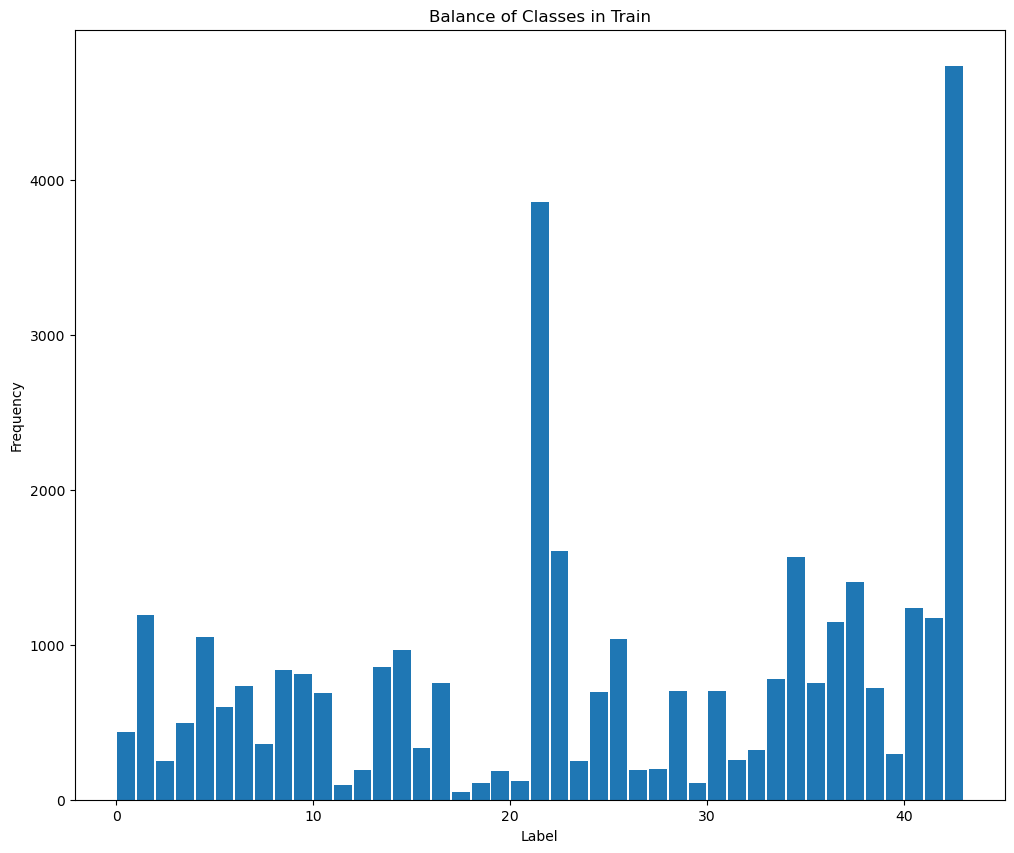

In [4]:
Traindf = pd.read_csv('TrainClf_Filtered.csv')

unique_values = np.unique(Traindf['labels'])
hist, edges = np.histogram(Traindf['labels'], bins = unique_values)
centers = (edges[:-1] + edges[1:]) / 2

bar_width = edges[1] - edges[0]

plt.figure(figsize=(12, 10))

plt.bar(centers, hist, width=0.9)

plt.title('Balance of Classes in Train')
plt.xlabel('Label')
plt.ylabel('Frequency')

# show the plot
plt.show()

In [3]:
num_classes = 44
resnet18_Filt = torchmodels.resnet18(pretrained=True)
resnet18_Filt.fc = nn.Linear(resnet18_Filt.fc.in_features, num_classes)


c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
batch_size = 32
my_transforms = transforms.Compose(
    [   
        transforms.Resize((224, 224)),
        transforms.Lambda(lambda x: x.convert('RGB')),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]
        ),
    ]
)


train_dataset = MaskDataset(
    csv_file=os.path.join(ROOT_THIS_DIR, "TrainClf_Filtered.csv"),
    root_dir=ROOT_THIS_DIR,
    transform=my_transforms,

)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=batch_size, shuffle=True)

val_dataset = MaskDataset(
    csv_file=os.path.join(ROOT_THIS_DIR, "ValClf_Filtered.csv"),
    root_dir=ROOT_THIS_DIR,
    transform=my_transforms,

)

val_loader = DataLoader(dataset=val_dataset,
                         batch_size=batch_size, shuffle=True)

In [5]:
EPOCHS = 5
LR = 1e-3

model = resnet18_Filt
model.to(device)
early_stopping = EarlyStopping(patience=5, verbose=True)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.1, patience=5, verbose=True
)

muts.train_model(model,
                 train_loader, 
                 val_loader, 
                 criterion, 
                 optimizer,
                 scheduler, 
                 EPOCHS, 
                 device, 
                 early_stopping,)

100%|██████████| 1089/1089 [08:14<00:00,  2.20it/s]


Cost at epoch 1 is 0.4086076629213831 | valid_loss: 0.19334 | train_loss: 0.40861
Validation loss decreased (inf --> 0.193335).  Saving model ...


100%|██████████| 1089/1089 [07:40<00:00,  2.36it/s]


Cost at epoch 2 is 2.6553245048467122 | valid_loss: 1.39479 | train_loss: 2.65532
EarlyStopping counter: 1 out of 5


100%|██████████| 1089/1089 [07:38<00:00,  2.38it/s]


Cost at epoch 3 is 0.9585975612435897 | valid_loss: 0.68586 | train_loss: 0.95860
EarlyStopping counter: 2 out of 5


100%|██████████| 1089/1089 [07:33<00:00,  2.40it/s]


Cost at epoch 4 is 0.5374680040652211 | valid_loss: 0.47438 | train_loss: 0.53747
EarlyStopping counter: 3 out of 5


100%|██████████| 1089/1089 [07:33<00:00,  2.40it/s]


Cost at epoch 5 is 0.3582728039353566 | valid_loss: 0.34896 | train_loss: 0.35827
EarlyStopping counter: 4 out of 5


In [6]:
ground_truth, predicted = muts.check_accuracy(val_loader, model, device)
print("Using micro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='micro')
recall = recall_score(ground_truth, predicted, average='micro')
f1 = f1_score(ground_truth, predicted, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using macro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='macro')
recall = recall_score(ground_truth, predicted, average='macro')
f1 = f1_score(ground_truth, predicted, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using weighted average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='weighted')
recall = recall_score(ground_truth, predicted, average='weighted')
f1 = f1_score(ground_truth, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

Checking accuracy on given data


100%|██████████| 389/389 [02:14<00:00,  2.90it/s]


Got 11045 / 12437 with accuracy 88.81
Using micro average
Accuracy: 0.8880759025488462
Precision: 0.8880759025488462
Recall: 0.8880759025488462
F1 score: 0.8880759025488462
------------

Using macro average
Accuracy: 0.8880759025488462
Precision: 0.8844762235699576
Recall: 0.8470844519512745
F1 score: 0.8490745571968955
------------

Using weighted average
Accuracy: 0.8880759025488462
Precision: 0.8989835401230701
Recall: 0.8880759025488462
F1 score: 0.8856468036023152
------------



In [8]:
EPOCHS = 5
LR = 1e-3

model = Classifier_MBN_V0(num_classes, freeze = False)
model.to(device)

early_stopping = EarlyStopping(patience=5, verbose=True)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.1, patience=5, verbose=True
)

muts.train_model(model,
                 train_loader, 
                 val_loader, 
                 criterion, 
                 optimizer,
                 scheduler, 
                 EPOCHS, 
                 device, 
                 early_stopping,)

c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
c:\Users\borqu\anaconda3\envs\torch1_13\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 1089/1089 [07:34<00:00,  2.39it/s]


Cost at epoch 1 is 0.5894317459250921 | valid_loss: 0.32350 | train_loss: 0.58943
Validation loss decreased (inf --> 0.323499).  Saving model ...


100%|██████████| 1089/1089 [07:26<00:00,  2.44it/s]


Cost at epoch 2 is 0.24687559783671015 | valid_loss: 0.22313 | train_loss: 0.24688
Validation loss decreased (0.323499 --> 0.223130).  Saving model ...


100%|██████████| 1089/1089 [07:19<00:00,  2.48it/s]


Cost at epoch 3 is 0.16819845496940533 | valid_loss: 0.52140 | train_loss: 0.16820
EarlyStopping counter: 1 out of 5


100%|██████████| 1089/1089 [07:22<00:00,  2.46it/s]


Cost at epoch 4 is 0.16659526857126639 | valid_loss: 0.27341 | train_loss: 0.16660
EarlyStopping counter: 2 out of 5


100%|██████████| 1089/1089 [07:22<00:00,  2.46it/s]


Cost at epoch 5 is 0.17016588292777876 | valid_loss: 0.31876 | train_loss: 0.17017
EarlyStopping counter: 3 out of 5


In [9]:
ground_truth, predicted = muts.check_accuracy(val_loader, model, device)
print("Using micro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='micro')
recall = recall_score(ground_truth, predicted, average='micro')
f1 = f1_score(ground_truth, predicted, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using macro average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='macro')
recall = recall_score(ground_truth, predicted, average='macro')
f1 = f1_score(ground_truth, predicted, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

print("Using weighted average")

accuracy = accuracy_score(ground_truth, predicted)
precision = precision_score(ground_truth, predicted, average='weighted')
recall = recall_score(ground_truth, predicted, average='weighted')
f1 = f1_score(ground_truth, predicted, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print("------------\n")

Checking accuracy on given data


100%|██████████| 389/389 [02:27<00:00,  2.63it/s]

Got 11499 / 12437 with accuracy 92.46
Using micro average
Accuracy: 0.9245798826083461
Precision: 0.9245798826083461
Recall: 0.9245798826083461
F1 score: 0.9245798826083461
------------

Using macro average
Accuracy: 0.9245798826083461
Precision: 0.89093475744485
Recall: 0.8733052763657291
F1 score: 0.8727557887813819
------------

Using weighted average
Accuracy: 0.9245798826083461
Precision: 0.930831673077728
Recall: 0.9245798826083461
F1 score: 0.9244276387714583
------------

